## Different plots for Monthly mean temperatures of 2009

## EX1:

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2009 to 31 Dec 2009. value = -99 and 99 mean that they are the missing values. Remove it.

1. Plot the monthly mean of the temperature in 2009
2. Show the monthly mean values in the plot (value higher than the annual mean on top of the plot, lower than the annual mean below the plot). Please make sure that the values are not overlapped by the line plot.
3. Plot the variability (min-max) of the temperature
4. Show the minimum and maximum temperature


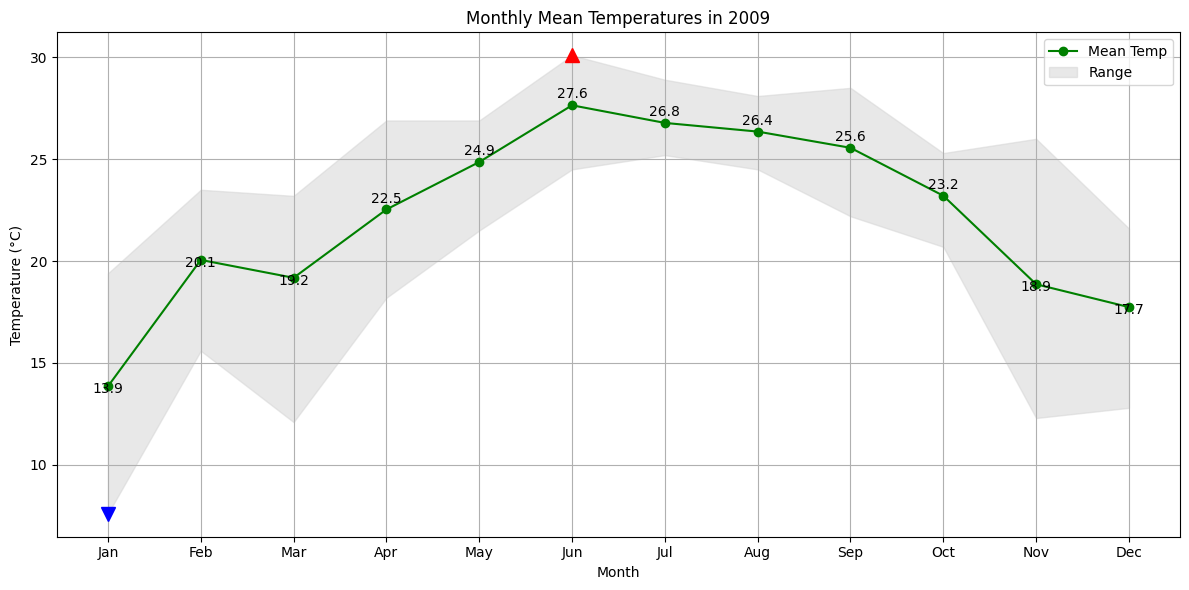

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with open('Data_EX1.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines[1:]:
    values = line.split()[1:]  
    if values:  
        try:
            float_values = [float(value) for value in values]
            data.append(float_values)
        except ValueError:
            print(f"Error converting line to float: {line.strip()}")

all_day_temp = np.array(data)

all_day_temp[all_day_temp == -99] = np.nan
all_day_temp[all_day_temp == 99] = np.nan

monthly_mean = np.nanmean(all_day_temp, axis=0)

monthly_min = np.nanmin(all_day_temp, axis=0)
monthly_max = np.nanmax(all_day_temp, axis=0)

annual_mean = np.nanmean(monthly_mean)

plt.figure(figsize=(12, 6))

plt.plot(monthly_mean, marker='o', label='Mean Temp', color='g')

for i, mean in enumerate(monthly_mean):
    offset = 0.5 if mean > annual_mean else -0.5
    plt.annotate(f'{mean:.1f}', (i, mean), textcoords="offset points", xytext=(0, offset * 10), ha='center')

plt.fill_between(range(len(monthly_mean)), monthly_min, monthly_max, color='lightgrey', alpha=0.5, label='Range')
plt.plot(5, monthly_max[5], '^', color='red', markersize=10)
plt.plot(0, monthly_min[0], 'v', color='blue', markersize=10)

month_names = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
plt.xticks(range(len(monthly_mean)), month_names)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Mean Temperatures in 2009')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


---

---

## EX2:
Using the same file as excercise 1. **Draw the heatmap of temperature in 2009**
Note: the colorbar and color palette must be the same as the sample plot the get the maximum points.


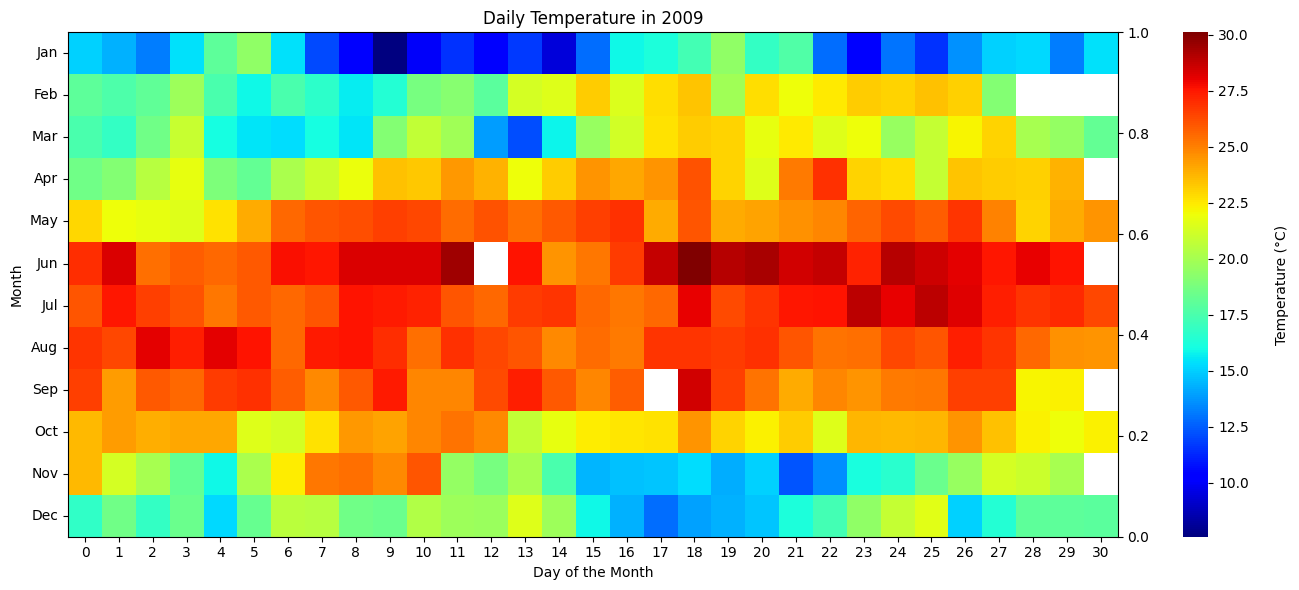

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

all_day_temp_transposed = all_day_temp.T

plt.figure(figsize=(14, 6))

heatmap = sns.heatmap(all_day_temp_transposed, cmap='jet', cbar=True, annot=False, fmt=".1f", linewidths=0, linecolor='black')

plt.title('Daily Temperature in 2009')
plt.ylabel('Month')
plt.xlabel('Day of the Month')

plt.yticks(ticks=np.arange(12) + 0.5, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)

ax2 = plt.gca().twinx()
ax2.set_ylabel('Temperature (°C)', labelpad=20)
ax2.yaxis.set_label_coords(1.15, 0.5)

plt.tight_layout()
plt.show()


---

---

## EX3:

Using the same input file as excercise 1. Draw the boxplot for 12 months. Plot the annual mean of data

---

---


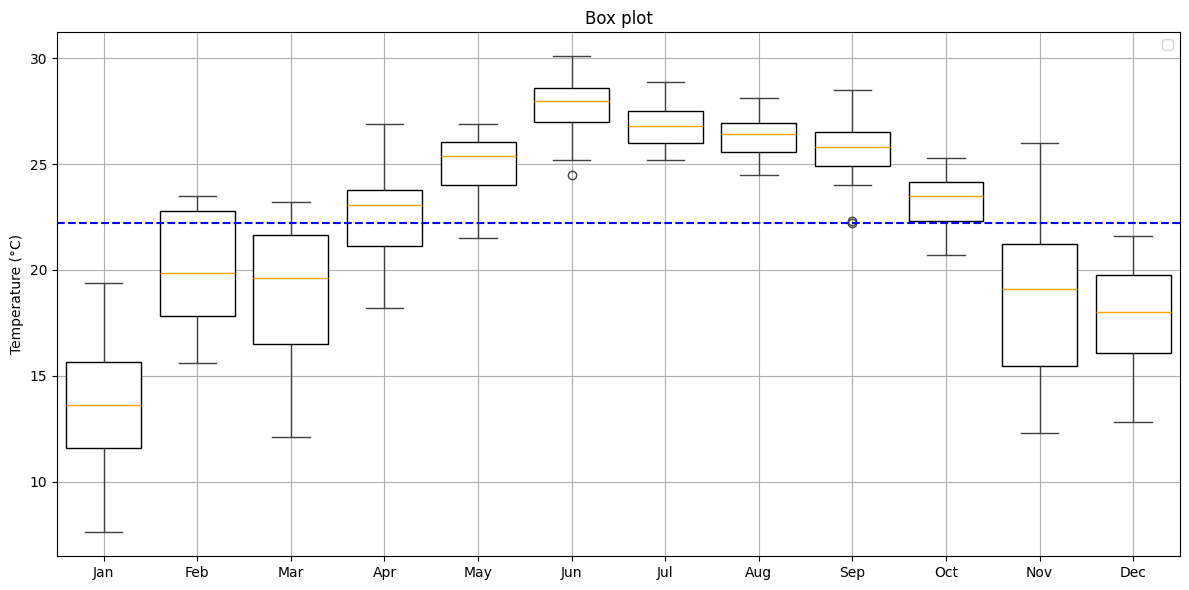

In [ ]:
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=all_day_temp,
                      boxprops=dict(facecolor='white', edgecolor='black'),
                      medianprops=dict(color='orange'))

plt.axhline(annual_mean, color='blue', linestyle='--')

plt.title('Box plot')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=np.arange(12), labels=["Jan", "Feb", "Mar", "Apr", "May",
                                          "Jun", "Jul", "Aug", "Sep", "Oct",
                                          "Nov", "Dec"])

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()